In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns

In [4]:
advertising_file_path = "./advertising.csv"
advertising = pd.read_csv(advertising_file_path)
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [5]:
advertising.shape

(200, 4)

,Sales,variable,value
0,22.1,TV,230.1
1,10.4,TV,44.5
2,12.0,TV,17.2
3,16.5,TV,151.5
4,17.9,TV,180.8
...,...,...,...
595,7.6,Newspaper,13.8
596,14.0,Newspaper,8.1
597,14.8,Newspaper,6.4
598,25.5,Newspaper,66.2


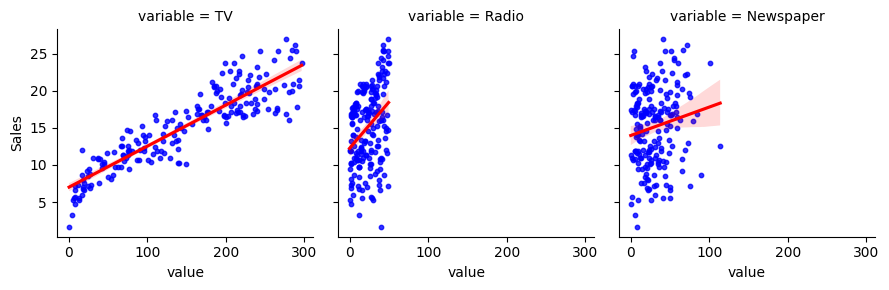

In [6]:
advertising_grid = pd.melt(advertising, id_vars="Sales", value_vars=['TV','Radio','Newspaper'])
g= sns.FacetGrid(advertising_grid, col="variable")
g.map(sns.regplot,"value","Sales", ci=95, scatter_kws={"color":"Blue",'s':10},
      line_kws={"color":"red"});
advertising_grid

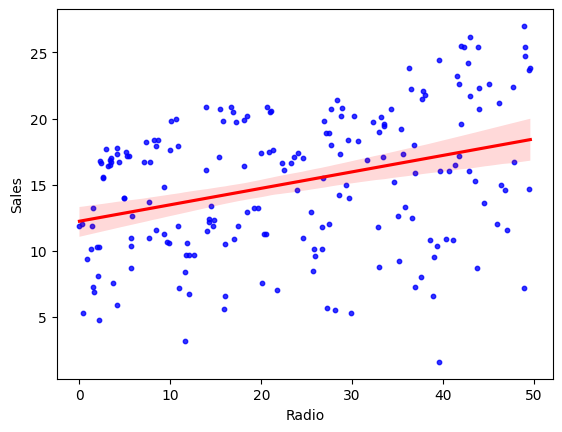

In [9]:
sns.regplot(data=advertising, x='Newspaper', y='Sales', ci=95,
            scatter_kws={"color":"blue",'s':10},
            line_kws={"color":"red"});